## Python for REU 2021

_Burt Rosenberg, 18 May 2021_


## The Numpy Library

Python is being used increasingly as a language for scientific computing because of its qualities as a programing language and because of community developed libraries extending the langauges abilities. One concern with using a powerful language like Python is that it loses the efficiency of languages which run "closer to the metal", although the analogy should be "closer to the silicon". For instance, programs written in C can be very efficient to run but they are not efficient to code. C codes slowly and requires extreme attention to detail.

The SciPy initiative attempts to solve this efficiency gap, and present powerful, efficient libraries of Python code for scientific programing. Some of these libraries are written in C to truely extend the way the language represents and manipulates data. These abilities are brought into your programs using an _import_ statement, naming a package or module that contains definitions. These then become avaiable for use in your program.

SciPy includes NumPy for numeric arrays, MatPlotLib for making graphs, and Pandas for tabularizing and cleaning data. In this page we talk about NumPy. The entire scipy library is described at [scipy.org](https://www.scipy.org/docs.html). One might also look at the [scipy-lectures](http://www.scipy-lectures.org/index.html) tutoral.

### Numpy features


NumPy introduces the class _ndarray_, a multi-dimensional array of numbers. The ndarray improves on the list for efficiency and the collection methods it supports. That includes the notion of _universal functions_ and _broadcasting_. These concepts and methods make it very intuitive to us arrays for scientific computation. 
 
 
Numpy arrays support:

* Element-wise operations;
* Indexing operations based on strides;
* No-copy views when reshaping, when possible;
* Fast arrays based on a direct C-like representation;
* Broadcasting;
* Ufuncts for arithmetic, logical, and common functions;
* Masking and fancy indexing

See the scipy.org numpy-1.12.0 [reference](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.html)






In [1]:
## the import's

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Example: constructing


In [2]:


#np.ones??
#np.zeros??

## How to make NDarrays

## Technique the first - intrinsic builders
a = np.zeros(12)
print(a)
a = np.ones(12)
print(a)


## Technique the second - from a list
x_list = [i for i in range(12)]
x = np.array(x_list, dtype=np.float64)
print(x)

## Technique the third - reference functions
x = np.arange(0.0, 5.0, 0.02)
print(f'array x has {len(x)} elements, the first 10 are {x[:10]}')

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11.]
array x has 250 elements, the first 10 are [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18]


In [3]:
## the shape or things

a = np.zeros(12)
print(a, a.shape)
a.shape = (3,4)
print(a)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] (12,)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Example:  broadcasting

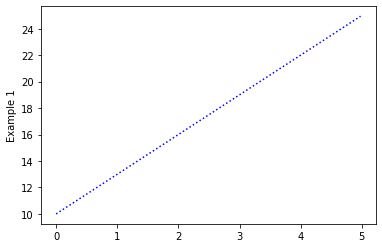

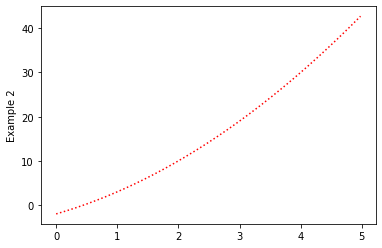

In [4]:

# they work like vectors

y = 3.0 * x + 10.0

plt.plot(x, y, 'b:')
plt.ylabel("Example 1")
plt.show()


y = x**2 + 4*x - 2.0

plt.plot(x, y, 'r:')
plt.ylabel("Example 2")
plt.show()

### Example:  Ufuncts

There are also special versions of math functions that can be applied in parallel to the ndarray, see [Math Routines](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.math.html)

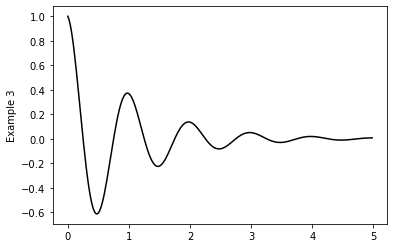

In [5]:
def f(t):
     return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.02)
plt.plot(t1, f(t1), 'k')
plt.ylabel("Example 3")
plt.show()

## Timing Results

In [6]:
import math


# in this corner .... lists!
a_list = [0.0 for i in range(1000000)]
b_list = [ 1.0 for i in range(1000000)]

# and in this corner, the challenger, ndarray!
a_ndarray = np.ones(1000000)
b_ndarray = np.zeros(1000000)


def arithmetic_looping(a,b):
        for i in range(len(a)):
                a[i] + b[i]
        return a
    
def arithmetic_ufunc(a,b):
    return a+b

print("\narithmetic using looping over a list")
%time arithmetic_looping(a_list,b_list)

print("\narithmetic  using looping over ndarray")
%time arithmetic_ufunc(a_ndarray,b_ndarray)

True


arithmetic using looping over a list
CPU times: user 86.3 ms, sys: 1.27 ms, total: 87.6 ms
Wall time: 90.4 ms

arithmetic  using looping over ndarray
CPU times: user 3.69 ms, sys: 4.02 ms, total: 7.7 ms
Wall time: 7.74 ms


True

In [7]:

def logical_looping(a,b):
        t = True
        for i in range(len(a)):
                t = t and (a[i]>b[i])
        return t
    
def logical_ufunc(a,b):
    return np.all(a>b)



print("\nlogical using looping over ndarray")
%time logical_looping(a_list,b_list)
print("\nlogical using ufunc")
%time logical_ufunc(a_ndarray,b_ndarray)


def applysin_looping(s):
    for f in s:
        math.sin(f)

def applysin_ufunc(s):
    np.sin(s)  # note it is not math.sin, but np.sin


mu, sigma = 0, 0.1
s = np.random.normal(mu, sigma, 1000000)

print("\nmath.sin and looping over ndarray")
%time applysin_looping(s)
print("\nnp.sin and ufunc's")
%time applysin_ufunc(s)




logical using looping over ndarray
CPU times: user 35.6 ms, sys: 1.54 ms, total: 37.1 ms
Wall time: 42.8 ms

logical using ufunc
CPU times: user 2.19 ms, sys: 484 µs, total: 2.68 ms
Wall time: 1.8 ms

math.sin and looping over ndarray
CPU times: user 180 ms, sys: 1.33 ms, total: 181 ms
Wall time: 183 ms

np.sin and ufunc's
CPU times: user 7.81 ms, sys: 2.15 ms, total: 9.96 ms
Wall time: 9.7 ms


## Exercise: Linear Regression

Given a two sets of observations over $n$ events, the Pearson R is a number between -1 and 1 summarizing the linear correlation between the two events. Numpy gives functions to compute all sorts of statistics, but for the purposes of this exercise, we only care about the linear algebra numpy function `np.dot` and `np.sum`.

The linear regression formula is a quick consequence of the Pearson R.


For some linear algebra routines see [Numpy Linear Algebra Reference](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.linalg.html)
For routines to do this directly see [Numpy Statistics Reference](https://docs.scipy.org/doc/numpy-1.12.0/reference/routines.statistics.html).


### Implementing class MyLinReg

The class MyLinReg includes static methods for various statistical formulas including the Pearson R, and a function returning the linear regression.

A static method is invoked as ClassName.function_name(). It does not have a self parameter. It can be called on an non-instanced of a class. It is a namespace. I think application, it is just a convenient way to collect together def's under a single namespace.

Look on the web for the usual definitions of the statistical functions. A simple presentation of linear regression as a consequence of the Pearson R is the given in the course Basic Statistics from the University of Amsterdam, [week 2](https://www.coursera.org/learn/basic-statistics/home/week/2).


#### Formula for Linear Regression

The formula is to calculate the parameters in `y = m x + b`. Covary both sides by `x`,

$$
  (y,x) = (m \, x + b, x) = m (x,x) + (b,x) = m (x,x) + 0
$$

or

$$
   m =  \frac{\mbox{COV}(y,x)}{ \mbox{VAR} (x) }= \frac{\mbox{SD}(y)}{ \mbox{SD}(x)} \;\;\frac { \mbox{COV}(y,x) }{\mbox{SD}(y) \;\mbox{SD}(x)} = \frac{\mbox{SD}(y) \;\mbox{PEARSON}(x,y)}{ \mbox{SD}(x)}
$$

and the intercept by taking the mean,

$$
E(y) = E( m \,x + b ) = m \,E(x) + b
$$

or 

$$
b = E(y) - m \,E(x)
$$


### Test: Chocolate consumption

Test on the example from week 2 of the Basic Statistics course.

The data is,

<pre>
x = np.array([50,100,200,300],dtype=np.float64)
y = np.array([50,70,70,95],dtype=np.float64)
</pre>

The answer is, 

<pre>
mean x = 162.5, std x = 110.86778913041725
mean y = 71.25, std x = 18.427786989579985
pearson = 0.9279436074843682
the regression slope = 0.15423728813559323, the regression intercept = -46.186440677966104
</pre>


### Test: Recovering parameter from noisey data

The define `prepare_the_noisey` returns simulated noisey data based on given model parameters, `m` and `b`, summed with Gaussian noise of width `r`. The linear regression should recover the model parameters.



In [8]:
#
# topics -
#    static methods
#    class methods
#    class name space


class MyLinReg:
    
    @staticmethod
    def mean(nd_a):
        """
        return the mean of the ndarray given
        """
        return np.sum(nd_a)/len(nd_a)

    @classmethod
    def covar(cls,nd_a,nd_b):
        """
        return the covariance between the two ndarrays given
        asssume the mean is a sample mean, and therefore the denominator
        for calculating the convariance is one less then the number 
        of data points.
        """
        assert len(nd_a)==len(nd_b)
        a = nd_a - cls.mean(nd_a)
        b = nd_b - cls.mean(nd_b)
        return np.dot(a,b)/(len(a)-1)   # loose a degree of freedom predicting mean from sample

    @classmethod
    def var(cls,nd_a):
        """
        return the variance of the ndarray given
        """
        return cls.covar(nd_a,nd_a)

    @classmethod
    def stddev(cls,nd_a):
        """
        return the standard deviation of the ndarray given
        """
        return np.sqrt(cls.var(nd_a))
    
    @classmethod
    def pearson(cls,nd_a,nd_b):
        """
        return the Pearson R between the two ndarrays given
        """
        return cls.covar(nd_a,nd_b)/(cls.stddev(nd_a)*cls.stddev(nd_b))

    @classmethod
    def linear_regression(cls,x,y):
        """
        do the linear regression between the two ndarrays given and 
        return a tuple with the slope, intercept, and a lambda 
        implementing the linear transformation of the regression.
        """
        m = cls.pearson(x,y)*cls.stddev(y)/cls.stddev(x)
        b = m*cls.mean(x)- cls.mean(y)
        rl = lambda x: m*x - b
        return(m,b,rl)


mean x = 162.5, std x = 110.86778913041725
mean y = 71.25, std x = 18.427786989579985
pearson = 0.9279436074843682
the regression slope = 0.15423728813559323, the regression intercept = -46.186440677966104


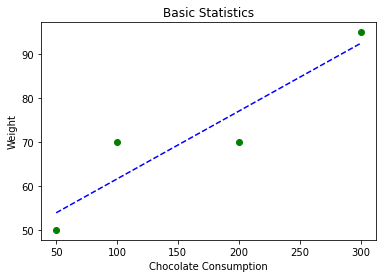

In [9]:
## test case
## this is from the Coursera Basic Statistic course, University of Amsterdam

x = np.array([50,100,200,300],dtype=np.float64)
y = np.array([50,70,70,95],dtype=np.float64)
m, b, regression_line = MyLinReg.linear_regression(x,y)

print(f'mean x = {MyLinReg.mean(x)}, std x = {MyLinReg.stddev(x)}')
print(f'mean y = {MyLinReg.mean(y)}, std x = {MyLinReg.stddev(y)}')
print(f'pearson = {MyLinReg.pearson(x,y)}')
print(f'the regression slope = {m}, the regression intercept = {b}')

plt.scatter(x,y,c='g')
plt.plot(x,regression_line(x),'b--',)
plt.xlabel("Chocolate Consumption")
plt.ylabel("Weight")
plt.title("Basic Statistics")
plt.show()

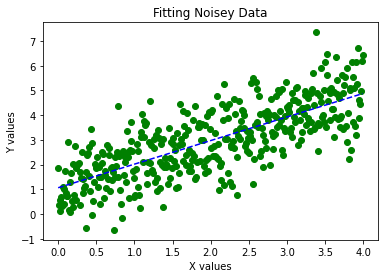

In [10]:
def prepare_the_noisy(n,m,b,r):
    x = np.arange(0,4,1.0/n)
    y = m*x + b + r*np.random.randn(len(x))
    return (x,y)

(x,y) = prepare_the_noisy(100,1,1,1)

(m,b,regression_line) = MyLinReg.linear_regression(x,y)

plt.scatter(x,y,c='g')
plt.plot(x,regression_line(x),'b--',)
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Fitting Noisey Data")
plt.show()


## Discussion: Broadcasting


Broadcasting allows for intuitive behavoir such as the multiplication of a scalar times a vector. In mathematics, the operation scales the vector, equivalently, it mutliplies each entry of the vector by the scalar,
<pre>
 &lambda; (x,y,z) = (&lambda; x, &lambda; y, &lambda; z )
</pre>
However, the Numpy package explains this behavoir as an example of _broadcasting_. 

The shape of an ndarray is given by its shape property. The shape property can be set as well as read. Note that the shape is of data type _tuple_. A _tuple_ is an an immutable sequence type. Its string representation is a comma separated sequence enclosed in parenthesis. A one element tuple has a trailing comma, to distinguish it as a tuple.

__Broadcast Compatible__

If two ndarrays are to be operated on, they must be _broadcast compatible_. They are broadcast compatible if they have the same shape or can be made to have the same shape with these rules,

1. If they two shapes different in the number of dimensions, the the shape with the lesser dimensions has 1's added on the left of the shape until it is the same dimension.

Example: The 3 vector with shape `(3,)` is made compatible to the a  2 by 3 matrix `(2,3)` by first promoting it to the shape `(1,3)`

2. When the shapes have the same number of dimension, they are broadcast capatible only if the value in each dimension agree, or where they disagree, at least one value is 1.


Example: the scalar of shape `(1,)` is compatible eith the vector of shape `(3,)`. The (promoted) vector `(1,3)` is also compatible with the matrix `(2,3)`.

3. When the shapes are compatible and of the same dimension but not identical, if the i-th location has 1 in the first shape and j in the second shape, promote the i-th location of the first shape to j, repeating j times the value at the first location.


Example: the scalar 3 is promoted to shape `(3,)` as the vector `(3, 3, 3)`. The vector `(1, 2, 3)` is promoted to the matrix `(2,3)` as the matrix `( (1, 2, 3), (1, 2, 3))`.

## Discussion: Numpy views

Numpy slices are _views_ not copies. Recall that Python slices are _shallow copies_ of the list (sliceable?).

Numpy arrays are accessed through a layer that maps the presented index into a C array (the underlying language of numpy is C language). This mapping layer is created by the slice, and wraps around the (unchanged) C array, to access it according to the slice request.



In [11]:
# example: I am not a copy

a = np.ones(4)
b = a[:]
b[0] = 2
print(a,b)

a = np.array([i for i in range(4)])
b = a[::-1]
b[0] = 9
print(a,b)

[2. 1. 1. 1.] [2. 1. 1. 1.]
[0 1 2 9] [9 2 1 0]


## Discussion: static and class methods


From the python docs:

>When a class definition is entered, a new namespace is created, and used as the local scope — thus, all assignments to local variables go into this new namespace. In particular, function definitions bind the name of the new function here.  &mdash; See: [python.org:Tutorial](https://docs.python.org/3/tutorial/classes.html)

The definitions provided with the `staticmethod` decorator do get entered into the namespace of the class, and therefore are accessed as if a property of the class object. However, they are entered as a function, not a method and so the `self` slot is not implemented.

The `classmethod` has an automatic first slot, customarily named `cls`. A class method is called using the dot notation, `D.class_method()` or `d.class_method()`. In the second case `d` is replaced with `type(d)`.




## Classes in Python vs. Java

Python handles classes differently than Java. Both Java and Python can handle classes different that third languages, C++ for example. 


### Casting: Coercion and conversion

I would like to differentiate between _type casting_, a.k.a. _coercion_, and _type conversion_. Googling brings up articles that I believe confuse these two. Conversion is turning a floating point number into an integer. True, its type changes, as happens in a type cast or coercion. But the conversion can be approximate. The test for this is whether whatever it is called is reversable. 

- A cast from class X to class Y, followed by a cast back on the object to class Y gives the identity. 
- A conversion between classes, this is not so.

From a 0.5 float to an integer, and back to a float gives either 0.0 or 1.0, depending on the language, but it is never 0.5 again. Information is lost. The change as a conversion of representation, and the representations are distinct and in some ways incompatible.

In C, such a coercion, from _(float *)_ to _(int *)_ and back, will give you quite a mess as an integer, but it will return to 0.5.

<pre>
#include&lt;stdio.h>
#include&lt;stdlib.h>

/*
 * crazy-cast.c
 * author: bjr
 * last update:
 *    23 May 2021
 *
 * Program to show the difference between casting and conversion.
 * Warning: the techniques are for demonstration purposes only.
 * You Have Been Warned.
 */

int main(int argc, char * argv[]) {
        float f, *fp ;
        int i, *ip ;

        // the case of __conversion__
        f = 0.5 ;
        i = (int) f ;
        f = (float) i ;
        printf("\nThe case of conversion\n") ;
        printf("orginal f=%f,\nconverted to an integer i=%d,\nconverted back to float f=%f\n",
                f, i, f) ;

        // the case of __coercion__
        f = 0.5 ;
        ip = (int *) &f ;
        fp = (float *) ip ;
        printf("\nThe case of coercion\n") ;
        printf("orginal f=%f,\ncoerced to an integer i=%d,\ncoerced back to float f=%f\n",
                *fp, *ip, *fp ) ;

        return 0 ;
}

% cc crazy_cast.c
% ./a.out 

The case of conversion
orginal f=0.000000,
converted to an integer i=0,
converted back to float f=0.000000

The case of coercion
orginal f=0.500000,
coerced to an integer i=1056964608,
coerced back to float f=0.500000

</pre>

Perhaps a good compromise, to keep the Internet Mavens happy, is to call them both casts, because the notation is a cast notation, and claim simply they failed to mention which sort of cast.


### Subtypes

In Java an object `O` of type `C`, where the class `C` that inherits from class `B`, can be cast to type `B`. In a sense, an object that naturally goes in a jar that has the trade dress of a `C` jar and be put in a jar with trade dress of a `B` jar. 


<pre>

Object O known as being type C

 Object O -----+
               |
               V
               
           [========]
            |       |
           /        \
          /          \
          |  **C**   |
          | the best |
          |          |
          +----------+
          
          
Object O known as being type B

 Object O -----+
               |
               V
               
           [========]
            |       |
           /        \
          /          \
          |  **B**   |
          |  superbe |
          |          |
          +----------+
</pre>

That happens to methods that are defined in both classes? What happens to properties (variables) defined in both classes?

    - For methods, the true type of `O` matters. Even when `O` is known as a type `B` the method defined in class `C is used.
    - For variables, the "trade dress" of `O` matters. When poured into a `B` jar that variable accessed is the one defined in class `B`
    
You can thing of syntatic types and semantic types. The syntatic type is that of the jar. That is because you can tell what type is the syntatic type by looking at the language syntax. The semantic type is the actual type of the object, and for that you must run the code and find out.


In Python, variables are not put in jars. They are bound to names. I am not sure what type the name is, but the type operator on the name gives the type of the object bound to the name. 


### Prototyping versus Casting

What Python has, rather than casting, is prototyping. The class points back to the classes it inherits from. This means that updates on the inherited object are immediated in the inheriting object.

In [24]:

   
class B:
    class_var = 1
 
class C(B):
    def get_class_var(self):
        return self.class_var
    
c1 = C()
c2 = C()
# this prints 1 1
print(c1.get_class_var(), c2.get_class_var())

B.class_var = 2
# this prints 2 2
print(c1.get_class_var(), c2.get_class_var())


1 1
2 2
